In [1]:
# %load ~/scripts/j.py
# A set of jupyter notebook presets. Located in ~/scripts/jpy.py

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import tqdm
import numpy as np

colors_k = [[0.8872, 0.4281, 0.1875],
            [0.2634, 0.6634, 0.4134],
            [0.0943, 0.5937, 0.8793],
            [0.3936, 0.2946, 0.6330]]


params = {'legend.fontsize': 22,
          'axes.labelsize': 30,
          'axes.titlesize': 30,
          'xtick.labelsize': 27,
          'ytick.labelsize': 22}
pylab.rcParams.update(params)

matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['mathtext.rm'] = 'serif'
matplotlib.rcParams['text.usetex'] = False
plt.rcParams["font.family"] = "cmr10"

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
N_fams = 3
linewidth = 4
legend_offset = -.27


In [2]:
import os
import torch
import numpy as np
import glob
import re
import sys
import seaborn as sns
import matplotlib.pyplot as plt
import tqdm
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import MNIST
from learned_inv.aug import *
softplus = torch.nn.Softplus()
xent = torch.nn.CrossEntropyLoss(reduction='none')
rots = range(-180, 180, 5)

import torch.nn.functional as F

(250, 72, 128)
(250, 128)


/tmp/ipykernel_90555/1054252277.py:14: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  plt.plot(np.arange(rang.shape[0]), rang.mean(-1), color=color, label="Input-Conditional Invariance (Ours)", linewidth=linewidth)


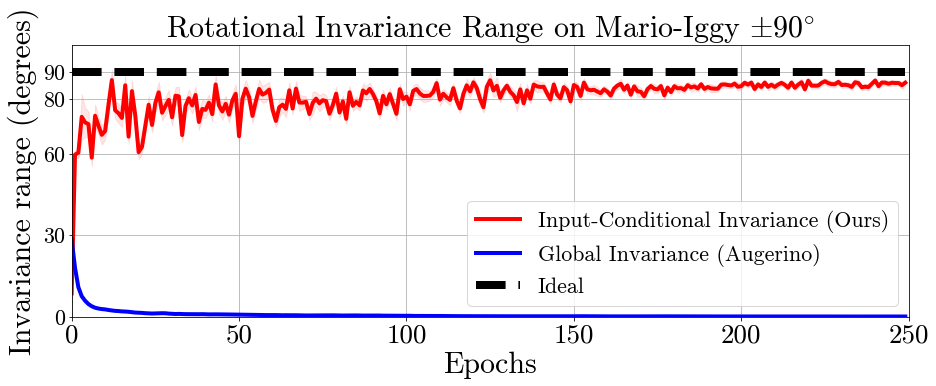

In [3]:
import pickle

logs = pickle.load(open("./ckpt/mario_rot_90/logs_dict.pkl", "rb"))
aug_curve = np.load('augerino_mario_90.npy')

plt.figure(figsize=(15,5))
rang_ = (np.array(logs['dist_plot']['ulim']) - np.array(logs['dist_plot']['llim']))/2
print(rang_.shape)

for c, r in [('r', 37)]:
    color = c
    rang = rang_.mean(1)
    print(rang.shape)
    plt.plot(np.arange(rang.shape[0]), rang.mean(-1), color=color, label="Input-Conditional Invariance (Ours)", linewidth=linewidth)
    plt.fill_between(np.arange(rang.shape[0]), rang.mean(-1)-rang_.std(1).mean(-1), rang.mean(-1)+rang_.std(1).mean(-1), color=color, alpha=0.1)


plt.plot(np.arange(250), aug_curve[::aug_curve.shape[0]//250]*90, color='b', label="Global Invariance (Augerino)", linewidth=linewidth)

plt.plot(np.arange(250), np.ones(250,)*90, 'k--', label="Ideal", linewidth=linewidth*2)


plt.ylabel("Invariance range (degrees)")
plt.xlabel("Epochs")



plt.title("Rotational Invariance Range on Mario-Iggy $\pm 90^{\circ}$")
# plt.ylim(60,90)
plt.ylim(0,100)
plt.yticks([0, 30, 60, 80, 90])
plt.grid()
plt.xlim(0, 250)
plt.legend()

# plt.savefig("figs/mario_90.pdf", bbox_inches='tight')

/tmp/ipykernel_7731/4247747757.py:7: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  plt.plot(rots[:-1], np.array([a['hist']  for a in logs['rot_plot'][-20:]]).mean(0)/hist.max(), c='b', label='Learned Distribution', linewidth=linewidth)


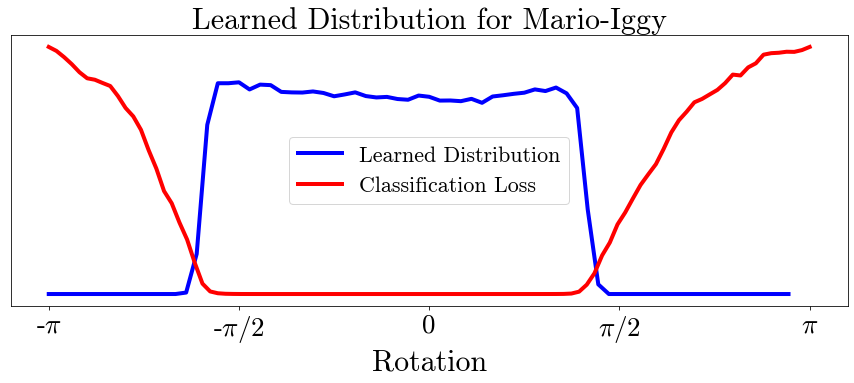

In [4]:
# mario rot 45


logs = pickle.load(open('ckpt/mario_rot_45/logs_dict.pkl', 'rb'))
hist, rots, loss = logs['rot_plot'][-1]['hist'], logs['rot_plot'][-1]['rots'], logs['rot_plot'][-1]['loss']
plt.figure(figsize=(15,5))
plt.plot(rots[:-1], np.array([a['hist']  for a in logs['rot_plot'][-20:]]).mean(0)/hist.max(), c='b', label='Learned Distribution', linewidth=linewidth)
plt.plot(np.linspace(-180, 180, 100), loss/loss.max(), c='r', label='Classification Loss', linewidth=linewidth)
plt.xticks([-180, -90, 0, 90, 180], ["-$\pi$", "-$\pi/2$", "0", "$\pi/2$", "$\pi$"])
plt.title("Learned Distribution for Mario-Iggy")
plt.xlabel("Rotation")
plt.yticks([])
plt.legend()

/tmp/ipykernel_7731/244784838.py:6: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  plt.plot(rots, hist/hist.max(), c='r', label='Ours', linewidth=linewidth)


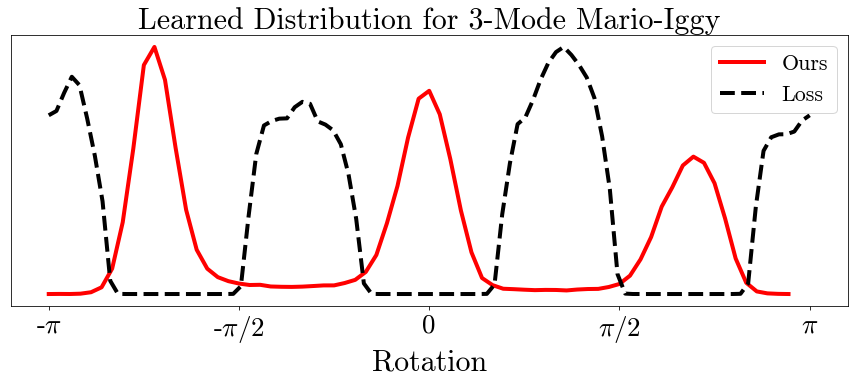

In [5]:
logs = pickle.load(open("ckpt/3mode/logs_dict.pkl", 'rb'))
loss = logs['rot_plot'][-1]['loss']
rots = logs['rot_plot'][0]['rots'][:-1]
hist = np.array([a['hist']  for a in logs['rot_plot'][-15:]]).mean(0)
plt.figure(figsize=(15,5))
plt.plot(rots, hist/hist.max(), c='r', label='Ours', linewidth=linewidth)
plt.plot(np.linspace(-180, 180, len(loss)), loss/loss.max(), 'k--',  label='Loss', linewidth=linewidth)
plt.xticks([-180, -90, 0, 90, 180], ["-$\pi$", "-$\pi/2$", "0", "$\pi/2$", "$\pi$"])
plt.title("Learned Distribution for 3-Mode Mario-Iggy")
plt.xlabel("Rotation")
plt.yticks([])
plt.legend()

/tmp/ipykernel_7731/777150760.py:19: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  plt.plot(savgol_filter(v, 5, 3), label=c, linewidth=linewidth, color=color_palette[i])  # window size 51, polynomial order 3


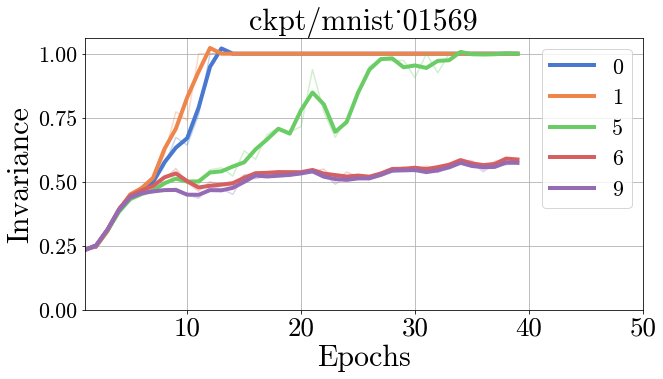

In [6]:
classes = [0,1,5,6,9]
for ckpt in ["ckpt/mnist_01569"]:
    class_lists = {}
    for c in classes:
        for log in pickle.load(open(f"{ckpt}/logs_dict.pkl", "rb"))["width_by_class"]:
            if c not in class_lists:
                class_lists[c] = []
            class_lists[c].append(log[c])
            
    class_lists = {c: np.array(class_lists[c]) for c in classes}

    from scipy.signal import savgol_filter
    import seaborn as sns

    color_palette = sns.color_palette("muted", 5)

    plt.figure(figsize=(10,5))
    for i, (c, v)in enumerate(class_lists.items()):
        plt.plot(savgol_filter(v, 5, 3), label=c, linewidth=linewidth, color=color_palette[i])  # window size 51, polynomial order 3
        plt.plot(v, alpha=0.3, color=color_palette[i])  # window size 51, polynomial order 3
    plt.legend()
    plt.xlabel("Epochs")
    plt.ylabel("Invariance")
    plt.title(ckpt)
    plt.yticks([0, 0.25, 0.5, 0.75, 1])
    plt.xlim(1, 50)
    plt.grid()

plt.show()

/tmp/ipykernel_7731/1905579628.py:21: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  plt.plot(savgol_filter(v, 15, 3), label=c, linewidth=linewidth, color=color_palette[i])  # window size 51, polynomial order 3


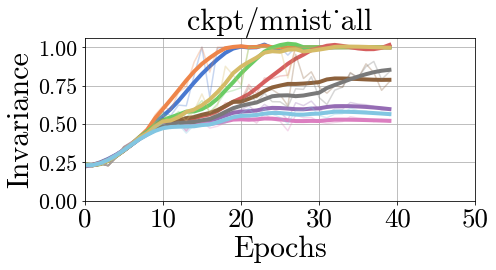

In [7]:
import pickle

classes = list(range(10))
for ckpt in ["ckpt/mnist_all"]: 
    class_lists = {}
    for c in classes:
        for log in pickle.load(open(f"{ckpt}/logs_dict.pkl", "rb"))["width_by_class"]:
            if c not in class_lists:
                class_lists[c] = []
            class_lists[c].append(log[c])
            
    class_lists = {c: np.array(class_lists[c]) for c in classes}

    from scipy.signal import savgol_filter
    import seaborn as sns

    color_palette = sns.color_palette("muted", 10)

    plt.figure(figsize=(7,3))
    for i, (c, v)in enumerate(class_lists.items()):
        plt.plot(savgol_filter(v, 15, 3), label=c, linewidth=linewidth, color=color_palette[i])  # window size 51, polynomial order 3
        plt.plot(v, alpha=0.3, color=color_palette[i])  # window size 51, polynomial order 3
    # plt.legend()
    plt.xlabel("Epochs")
    plt.ylabel("Invariance")
    plt.title(ckpt)
    plt.yticks([0, 0.25, 0.5, 0.75, 1])
    plt.xlim(1, 50)
    plt.xticks([0, 10, 20, 30, 40, 50])
    plt.grid()
 
plt.show()

## Rotgen

cls torch.Size([10000, 4])
(10000, 1) 0.0027759562 0.9999982


/tmp/ipykernel_7731/1165800999.py:38: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  plt.subplot(1, 2, 1)
/tmp/ipykernel_7731/1165800999.py:41: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  plt.colorbar()
/tmp/ipykernel_7731/1165800999.py:47: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  plt.subplot(1, 2, 2)
/tmp/ipykernel_7731/1165800999.py:54: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  plt.colorbar()


Text(0, 0.5, '$w_2$')

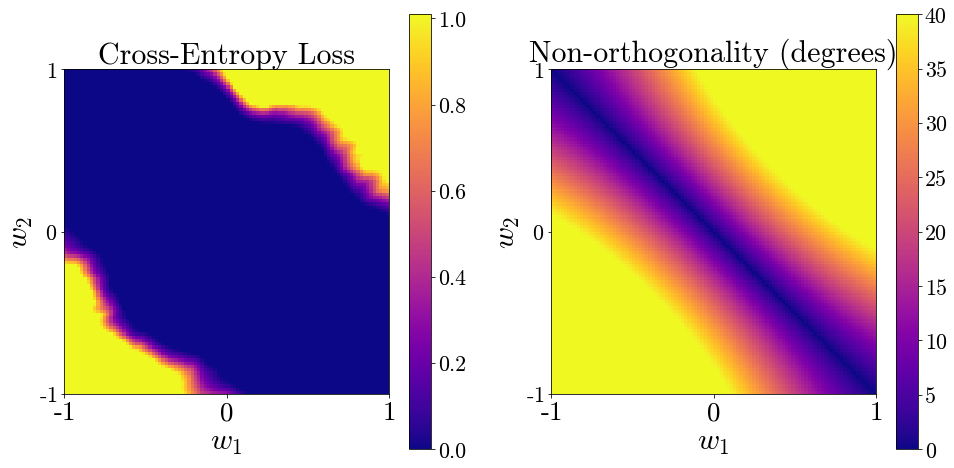

In [8]:
classifier = torch.load('./rotgen_mlp_classifier.pth')
from learned_inv.aug import Augerino, AugType

# Define the rotation generator
augmenter = Augerino(aug_type=AugType.ROTGEN).cuda()
mlp=True

# Sampel random weights
# Sample grid of weights 
grid_points = 100
rang = 1
x, y = np.meshgrid(np.linspace(-rang, rang, grid_points), np.linspace(-rang, rang, grid_points))
x, y = x.flatten(), y.flatten()

weights = np.stack([x*0, x*0, x, x*0, x*0, y], axis=-1)
weights = torch.from_numpy(weights).float().cuda()


imgs = np.load("./data/images.npz")
inp = torch.FloatTensor(imgs['mario']).reshape(1, 3, 32, 32).cuda()    
lab = torch.tensor(0).unsqueeze(0).cuda()


affine_matrices = augmenter.weights_to_affine(weights)
x_out = augmenter.apply_affine(inp.repeat(weights.shape[0], 1, 1, 1), affine_matrices)
if mlp:
    cls = classifier(x_out.reshape(-1, 3*32*32))
else:
    cls = classifier(x_out)
cls = torch.softmax(cls, dim=-1)
print("cls", cls.shape)
cls = cls[:, lab].detach().cpu().numpy()
print(cls.shape, cls.min(), cls.max())

# Plot cls as a heatmap

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
# plt.imshow(all_loss.mean(axis=0).reshape(grid_points, grid_points), cmap="plasma", origin="lower")
plt.imshow(-np.log(cls.reshape(grid_points, grid_points)+1e-1), cmap="plasma", origin="lower", extent=[-rang, rang, -rang, rang], vmin=0, vmax=1.01)
plt.colorbar()
plt.xlabel('$w_1$')
plt.ylabel('$w_2$')
plt.xticks([-1, 0, 1], ["-$1$", "$0$", "$1$"])
plt.yticks([-1, 0, 1], ["-$1$", "$0$", "$1$"])
plt.title("Cross-Entropy Loss")
plt.subplot(1, 2, 2)
twobytwo = affine_matrices[:, :2, :2].detach().cpu()
col1, col2 = twobytwo[:, :, 0], twobytwo[:, :, 1]
cosine_similarity = (col1 * col2).sum(-1) / (col1.norm(dim=-1) * col2.norm(dim=-1))
angle = torch.acos(cosine_similarity) * 180 / np.pi
angle =((angle-90).abs()+1e-3)
plt.imshow(angle.reshape(grid_points, grid_points), cmap="plasma", origin="lower", extent=[-rang, rang, -rang, rang], vmin=0, vmax=40)
plt.colorbar()
plt.title("Non-orthogonality (degrees)")
plt.xticks([-1, 0, 1], ["-$1$", "$0$", "$1$"])
plt.yticks([-1, 0, 1], ["-$1$", "$0$", "$1$"])
plt.xlabel('$w_1$')
plt.ylabel('$w_2$')
# plt.savefig("figs/ rotgen_mlp.pdf", bbox_inches='tight', pad_inches=0)

/tmp/ipykernel_7731/3143589125.py:4: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  ax4 = fig.add_subplot(121)
/tmp/ipykernel_7731/3143589125.py:42: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  ax5 = fig.add_subplot(122)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/home/utkarsh/anaconda3/envs/pt111/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)


shapes torch.Size([1, 3, 32, 32]) 2000 torch.Size([2000, 3, 3])
weights before format torch.Size([2000, 2])
weights after format torch.Size([2000, 2])
cls tensor([[9.9999e-01, 5.3871e-06, 6.7899e-06, 2.2307e-06],
        [9.9997e-01, 7.2078e-06, 1.5955e-05, 5.3733e-06],
        [9.9970e-01, 1.7702e-04, 8.1168e-05, 4.6626e-05],
        ...,
        [9.9981e-01, 7.3272e-05, 1.0954e-04, 7.9850e-06],
        [9.9995e-01, 1.7824e-05, 3.2336e-05, 3.5087e-06],
        [9.9998e-01, 8.7857e-06, 9.9278e-06, 5.5041e-06]], device='cuda:0')
(2000, 1) 0.9884355 0.9999981


/home/utkarsh/anaconda3/envs/pt111/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


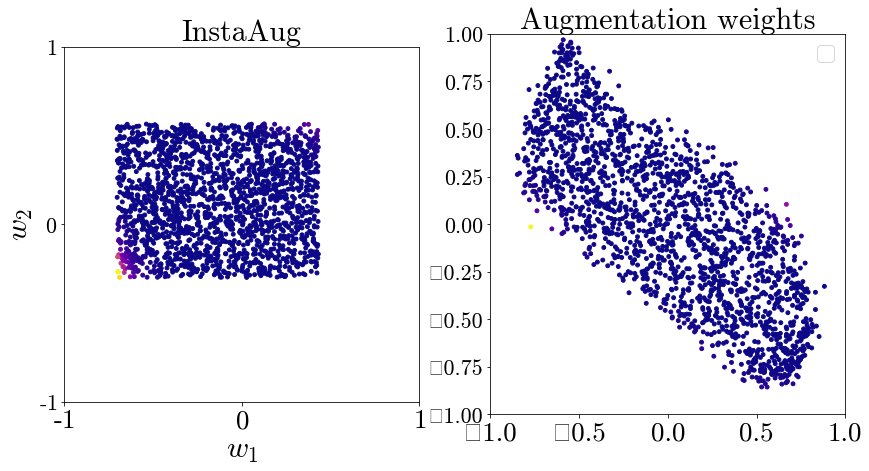

In [9]:
N_samps = 2000
with torch.no_grad():
    fig = plt.figure(figsize=(14, 7))
    ax4 = fig.add_subplot(121)


    imgs = np.load("./data/images.npz")
    inp = torch.FloatTensor(imgs['mario']).reshape(1, 3, 32, 32).cuda()    
    lab = torch.tensor(0).unsqueeze(0).cuda()
                
    classifier = torch.load('./rotgen_mlp_classifier.pth')
    ours = torch.load('ckpt/rotgen/mlp/ours/new_model.pt')
    iaug = torch.load('ckpt/rotgen/mlp/iaug/new_model.pt')
                

    ###
    emb = iaug.pose_embedder(inp).repeat(N_samps, 1)
    weights, _ = iaug.augmenter.sample_weights(emb)
    w_ = weights.detach().cpu().numpy()
    weights = iaug.augmenter.format_weights(weights)
    affine_matrices = iaug.augmenter.weights_to_affine(weights)
    print("shapes", inp.shape, N_samps, affine_matrices.shape)
    x_out = iaug.augmenter.apply_affine(inp.repeat(N_samps, 1, 1, 1), affine_matrices)
    cls = classifier(x_out)
    cls = torch.softmax(cls, dim=-1)
    loss = torch.nn.functional.cross_entropy(cls, lab.repeat(N_samps))

    cls_aug = cls[:, lab].detach().cpu().numpy()
    cls_aug = -np.log(cls_aug+1e-3)
    w_aug = w_

    ax4.scatter(w_[:, 0], w_[:, 1], c=cls_aug, s=15, cmap='plasma')
    ax4.set_title("InstaAug")
    ax4.set_xlim(-1, 1)
    ax4.set_ylim(-1, 1)
    plt.xticks([-1, 0, 1], ["-$1$", "$0$", "$1$"])
    plt.yticks([-1, 0, 1], ["-$1$", "$0$", "$1$"])
    plt.xlabel('$w_1$')
    plt.ylabel('$w_2$')
    ax4.set_aspect('equal')

    ax5 = fig.add_subplot(122)

    emb = ours.pose_embedder(inp).repeat(N_samps, 1)
    base_q0_params_context = ours.augmenter.projection(emb)
    weights, _ = ours.augmenter.nf_model.sample(emb, base_q0_params_context)
    print(f"weights before format {weights.shape}")
    
    w_ours =  ours.augmenter.format_weights(weights)
    print(f"weights after format {weights.shape}")
    affine_matrices = ours.augmenter.weights_to_affine(w_ours)
    x_out = ours.augmenter.apply_affine(inp.repeat(N_samps, 1, 1, 1), affine_matrices)
    cls = ours.classifier(x_out)
    cls = torch.softmax(cls, dim=-1)
    print("cls", cls)
    cls = cls[:, lab].detach().cpu().numpy()
    cls_ours = -np.log(cls+1e-3)
    print(cls.shape, cls.min(), cls.max())
    # ax4.scatter(w_[:, 0], w_[:, 1], c=cls, s=15)
    ax5.scatter(w_ours[:, 2].detach().cpu().numpy(), w_ours[:, 5].detach().cpu().numpy(), c=cls_ours, s=15, cmap='plasma')
    ax5.set_title("Augmentation weights")
    ax5.set_xlim(-1, 1)
    ax5.set_ylim(-1, 1)
    ax5.legend()

In [10]:
def symmetric_orthogonalization(x):
  """Maps 9D input vectors onto SO(3) via symmetric orthogonalization.

  x: should have size [batch_size, 9]

  Output has size [batch_size, 3, 3], where each inner 3x3 matrix is in SO(3).
  """
  m = x.view(-1, 3, 3)
  u, s, v = torch.svd(m)
  vt = torch.transpose(v, 1, 2)
  det = torch.det(torch.matmul(u, vt))
  det = det.view(-1, 1, 1)
  vt = torch.cat((vt[:, :2, :], vt[:, -1:, :] * det), 1)
  r = torch.matmul(u, vt)
  return r

/tmp/ipykernel_7731/2613619813.py:2: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  ax6 = plt.subplot(111)


[]

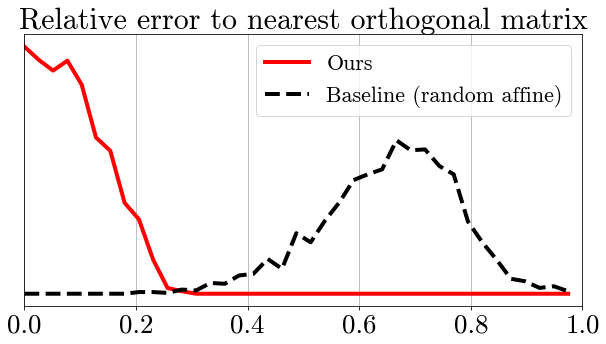

In [11]:
plt.figure(figsize=(10, 5))
ax6 = plt.subplot(111)
orth_approx = symmetric_orthogonalization(affine_matrices)
rel_err = (orth_approx-affine_matrices).norm(dim=(-1, -2))/(affine_matrices).norm(dim=(-1, -2))
hist, bins = np.histogram(rel_err.detach().cpu().numpy(), bins=np.linspace(0,1,40), density=True)
ax6.plot(bins[:-1], hist, linewidth=linewidth, label='Ours', c='red')

random_affine_matrices = torch.randn_like(affine_matrices)
random_affine_matrices[:, 2, 0] = 0
random_affine_matrices[:, 2, 1] = 0
random_affine_matrices[:, 2, 1] = 1
orth_approx = symmetric_orthogonalization(random_affine_matrices)
rel_err = (orth_approx-random_affine_matrices).norm(dim=(-1, -2))/(random_affine_matrices).norm(dim=(-1, -2))
hist, bins = np.histogram(rel_err.detach().cpu().numpy(), bins=np.linspace(0,1,40), density=True)
ax6.plot(bins[:-1], hist, linewidth=linewidth, label='Baseline (random affine)', c='black', linestyle='--')

ax6.set_xlim(0, 1)
ax6.grid()
ax6.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
ax6.legend()
ax6.set_title("Relative error to nearest orthogonal matrix")
ax6.set_yticks([])
# ax6.set_aspect('equal')

## EKLD plots

In [12]:
import learned_inv.aug as aug
import time

def compute_divs(model, dataloader, rot_ranges):
    # switch to evaluate mode
    softmax = torch.nn.Softmax(dim=-1)
    eps = 1e-8
    safelog = lambda x: torch.log(x+eps)
    kl_div = lambda x, y: torch.sum(x * (safelog(x) - safelog(y)), dim=-1)
    try:
        model.eval()
    except Exception as e:
        print(e)
        print("Could not set model to eval mode. Continuing anyway.")

    ref_outs = []
    ref_preds = []
    ref_targets = []
    with torch.no_grad():
        end = time.time()
        for i, (input, target) in enumerate(dataloader):
            input = input.to('cuda')
            target = torch.tensor(target).to('cuda')
            # compute output
            output = model(input)
            
            # Check for nans
            assert not torch.isnan(output).any()
            assert not torch.isnan(target).any()

            _, pred = torch.max(output, 1)
            ref_preds.extend(pred.cpu().numpy())
            ref_targets.extend(target.cpu().numpy())
            ref_outs.extend(output.cpu().numpy())
    # Make copy of preds, targets, outs to numpy arrays with prefix new_
    ref_preds = np.array(ref_preds)
    ref_targets = np.array(ref_targets)
    ref_outs = np.array(ref_outs)

    ref_outs = softmax(torch.from_numpy(ref_outs)).numpy()
    

    kl_divs = {}
    for rot in tqdm.tqdm(rot_ranges):
        new_outs = []
        new_preds = []
        new_targets = []
        with torch.no_grad():
            end = time.time()
            for i, (input, target) in enumerate(dataloader):
                input = input.cuda()
                target = torch.tensor(target).cuda()

                input = torch.stack([aug.rot_img(inp[None,...], np.random.uniform(-rot,rot))[0] for inp in input], dim=0)

                # compute output
                output = model(input)
                
                # Check for nans
                assert not torch.isnan(output).any()
                assert not torch.isnan(target).any()
                assert not torch.isnan(input).any()

                _, pred = torch.max(output, 1)
                new_preds.extend(pred.cpu().numpy())
                new_targets.extend(target.cpu().numpy())
                new_outs.extend(output.cpu().numpy())
        # Make copy of preds, targets, outs to numpy arrays with prefix new_
        new_preds = np.array(new_preds)
        new_targets = np.array(new_targets)
        new_outs = np.array(new_outs)
    
        new_outs = softmax(torch.from_numpy(new_outs)).numpy()
        
        assert not torch.isnan(torch.tensor(new_outs)).any()
        assert not torch.isnan(torch.tensor(ref_outs)).any()
        assert not torch.isnan(torch.tensor(new_targets)).any()
        
        kl_div_per_example = kl_div(torch.tensor(ref_outs), torch.tensor(new_outs)) # Self kl, should just be 0
        
        assert not torch.isnan(kl_div_per_example).any()
        
        kl_div_per_class = [torch.mean(kl_div_per_example[ref_targets == k]) for k in range(10)]
        kl_divs[rot] = kl_div_per_class
    return kl_divs

In [13]:
from learned_inv.lila.datasets import RotatedCIFAR10

In [14]:
from torchvision import datasets, transforms
mean = [x / 255 for x in [125.3, 123.0, 113.9]]
std = [x / 255 for x in [63.0, 62.1, 66.7]]
transform_list = [transforms.ToTensor(), transforms.Normalize(mean, std)]
transform = transforms.Compose(transform_list)
        

dset = RotatedCIFAR10('./data/', 0, train=False, download=False, transform=transform)
loader = torch.utils.data.DataLoader(dset, batch_size=128, shuffle=False, num_workers=4)

all_kl_divs = {}

def ours_inference(inputs, n_copies=100):
    ours_aug.n_samples = n_copies
    X = ours_aug(inputs)
    return ours_model(X).mean(dim=1)

def naive_inference(inputs):
    return naive_model(inputs[:, None]).mean(dim=1)


ours_model = torch.load('./ckpt/cifar10lt/model.pt')
ours_aug = torch.load('./ckpt/cifar10lt/augmenter.pt')

naive_model = torch.load('./ckpt/cifar10lt_naive/model.pt')

ours_inference_divs = compute_divs(ours_inference, loader, [10])
naive_divs = compute_divs(naive_inference, loader, [10])

all_kl_divs['ours_inference'] = ours_inference_divs

'function' object has no attribute 'eval'
Could not set model to eval mode. Continuing anyway.


/tmp/ipykernel_7731/1826601876.py:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  target = torch.tensor(target).to('cuda')
  0%|          | 0/1 [00:00<?, ?it/s]/tmp/ipykernel_7731/1826601876.py:52: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  target = torch.tensor(target).cuda()
100%|██████████| 1/1 [00:19<00:00, 19.31s/it]

'function' object has no attribute 'eval'
Could not set model to eval mode. Continuing anyway.



100%|██████████| 1/1 [00:06<00:00,  6.45s/it]


/tmp/ipykernel_7731/1373571124.py:5: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  plt.plot(class_sizes, np.stack([np.array(naive_divs[deg]) for deg in degs_plot], axis=0).mean(axis=0), label=f'Baseline', c='black', linewidth=linewidth)


([<matplotlib.axis.YTick at 0x7fd51012e4c0>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

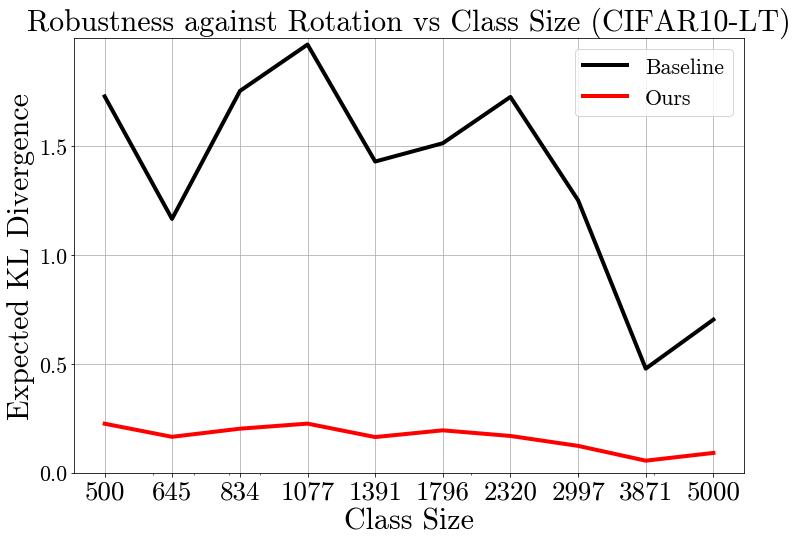

In [15]:
class_sizes = [5000, 3871, 2997, 2320, 1796, 1391, 1077, 834, 645, 500] # For MNIST_LT
degs_plot = [10]

plt.figure(figsize=(12,8))
plt.plot(class_sizes, np.stack([np.array(naive_divs[deg]) for deg in degs_plot], axis=0).mean(axis=0), label=f'Baseline', c='black', linewidth=linewidth)
plt.plot(class_sizes, np.stack([np.array(ours_inference_divs[deg]) for deg in degs_plot], axis=0).mean(axis=0), label=f'Ours', c='red', linewidth=linewidth)
# plt.plot(class_sizes, np.stack([np.array(augerino_inference_divs[deg]) for deg in degs_plot], axis=0).mean(axis=0), label=f'Augerino', c='blue', linewidth=linewidth)

plt.semilogx()
plt.xticks(class_sizes, class_sizes)

plt.legend()
plt.grid()
plt.ylabel('Expected KL Divergence')
plt.xlabel('Class Size')
plt.title('Robustness against Rotation vs Class Size (CIFAR10-LT)')
plt.ylim(0, 2)
plt.yticks([0, 0.5, 1, 1.5])